## 2 Machine Learning
Le jeu de donnée contenu dans data.csv est un ensemble de relevés de vélos partagé
(type Vélib). On cherche à prédire le nombre de vélos loués par heure dans la ville (variable count).

### Partie I Analyse statistique
Avant de commencer la modélisation expliquez quels sont les facteurs qui semblent influencer la demande en vélos. Présentez des graphiques pertinents pour votre analyse
statistique et interprétez les.


In [60]:
# import 
import os
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
#Loading the csv file into dataframe
data =  pd.read_csv(r"C:\Users\33642\Downloads\data.csv", index_col = 0)
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


In [62]:
# Drop duplicates
print('Shape of data before removing duplicates', data.shape[0])
data.drop_duplicates(inplace=True)
print('Shape of data after removing duplicates', data.shape[0])

10886

In [63]:
# number of missing values in the dataframe
data_missing_value = pd.DataFrame(data.isnull().sum())
# number of examples in the dataframe
data_size = len(data)
print('data size: ', data_size)

# Display missing values
data_missing_value = data_missing_value.rename(columns = {'index': 'Examples', 0: 'Number_missing_value'})
data_missing_value


date size:  10886


,Number_missing_value
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


###### Les facteurs qui semblent influencer la demande en vélos. 

- Quelle saison compte le plus grand nombre vélos loués?

- Quels attributs sont directement proportionnels au nombre de vélos loués?

- Qu'est-ce qui fait que le nombre de vélos loués est le plus élevé?

- Qu'est-ce qui fait que le nombre de vélos loués le plus bas?


             datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  hour        days  day  \
0        81        0.0       3          13     16     0  2011-01-01    1   
1        80        0.0       8          32     40     1  2011-01-01    1   
2        80        0.0       5          27     32     2  2011-01-01    1   
3        75        0.0       3          10     13     3  2011-01-01    1   
4        75        0.0       0           1      1     4  2011-01-01    1   

   month  year  
0      1  2011  
1      1  2011  
2      1  2011  
3      1  20

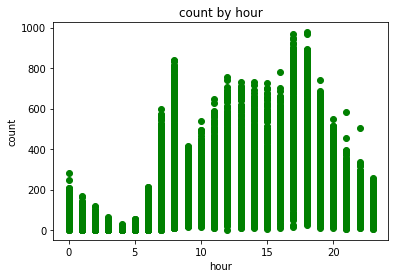

In [317]:
# Split the datetime into hour, day, month, year
data['datetime'] =  pd.to_datetime(data['datetime'])
data['hour'] = data.datetime.apply(lambda x : x.hour)
data['day'] = data.datetime.apply(lambda x : x.day)
data["month"] =  data.datetime.apply(lambda x : x.month)
data["year"] =  data.datetime.apply(lambda x : x.year)
data["days"] = data.datetime.apply(lambda x : x.date())
print(data.head(5))

# Plot data regarding count and hour
plt.scatter(data['hour'].values, data['count'].values, color='g')
plt.xlabel('hour')
plt.ylabel('count')
plt.title('count by hour');

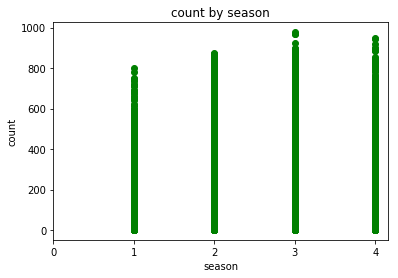

In [65]:
#plot count by season
bars = ('0', '1', '2', '3', '4')
y_pos = np.arange(len(bars))
plt.scatter(data['season'].values, data['count'].values, color='g')
plt.xlabel('season')
plt.ylabel('count')
plt.title('count by season')
# Create names
plt.xticks(y_pos, bars);

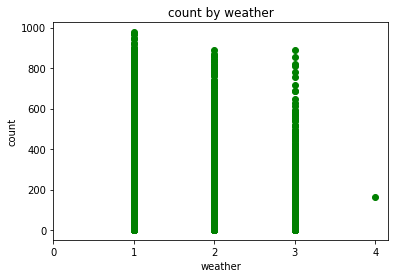

In [342]:
# Plot count by weather
bars = ('0', '1', '2', '3', '4')
y_pos = np.arange(len(bars))
plt.scatter(data['weather'].values, data['count'].values, color='g')
plt.xlabel('weather')
plt.ylabel('count')
plt.title('count by weather')
# Create names
plt.xticks(y_pos, bars);

In [68]:
# Total number of counts
data['count'].sum()


2085476

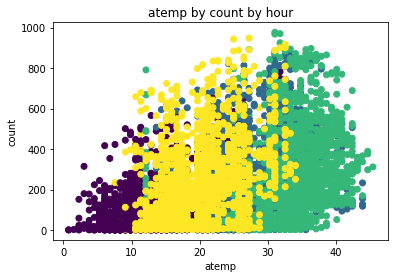

In [345]:
#Correlation between atemp and  count by hour

plt.scatter(data['atemp'].values, data['count'].values, data=data, c='season')
plt.xlabel('atemp')
plt.ylabel('count')
plt.title('atemp by count by hour');

days
2011-01-01     985
2011-01-02     801
2011-01-03    1349
2011-01-04    1562
2011-01-05    1600
Name: count, dtype: int64
days
2011-01-01    18.181250
2011-01-02    17.686957
2011-01-03     9.470227
2011-01-04    10.606087
2011-01-05    11.463478
Name: atemp, dtype: float64


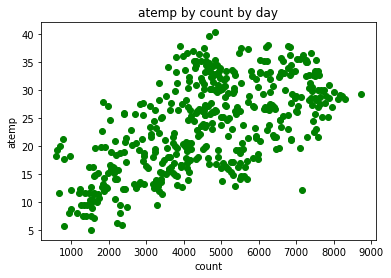

In [349]:
# CHeck the correlation between atemp and  count by day

# count groupby by day
gbc = data.groupby(['days'])["count"].sum()

# atemp group by day and averaged
gbat = data.groupby(['days'])['atemp'].mean()

#Plot the data 
plt.scatter(gbc, gbat, color='g')
plt.xlabel('count')
plt.ylabel('atemp')
plt.title('atemp by count by day');

#Check groupby results
print(gbc.head(5))
print(gbat.head(5))

In [339]:
#Pearson correlation coefficient
# is a measure of the linear correlation between two variables X and Y. 
from scipy.stats.stats import pearsonr

print('pearson correlation coefficient between atemp and count by hour')
print (pearsonr(data['atemp'].values, data['count'].values)[0])

print('pearson correlation coefficient between atemp and count by day')
print (pearsonr(gbc, gbat)[0])



pearson correlation coefficient by hours
0.3897844366269768
pearson correlation coefficient by days
0.6129558633062548


In [361]:
# Select subset of columns from data
df = data[["temp", "atemp", "windspeed", "count", "hour", "workingday", "weather"]]

# Check df
df.head(5)

,temp,atemp,windspeed,count,hour,workingday,weather
0,9.84,14.395,0.0,16,0,0,1
1,9.02,13.635,0.0,40,1,0,1
2,9.02,13.635,0.0,32,2,0,1
3,9.84,14.395,0.0,13,3,0,1
4,9.84,14.395,0.0,1,4,0,1


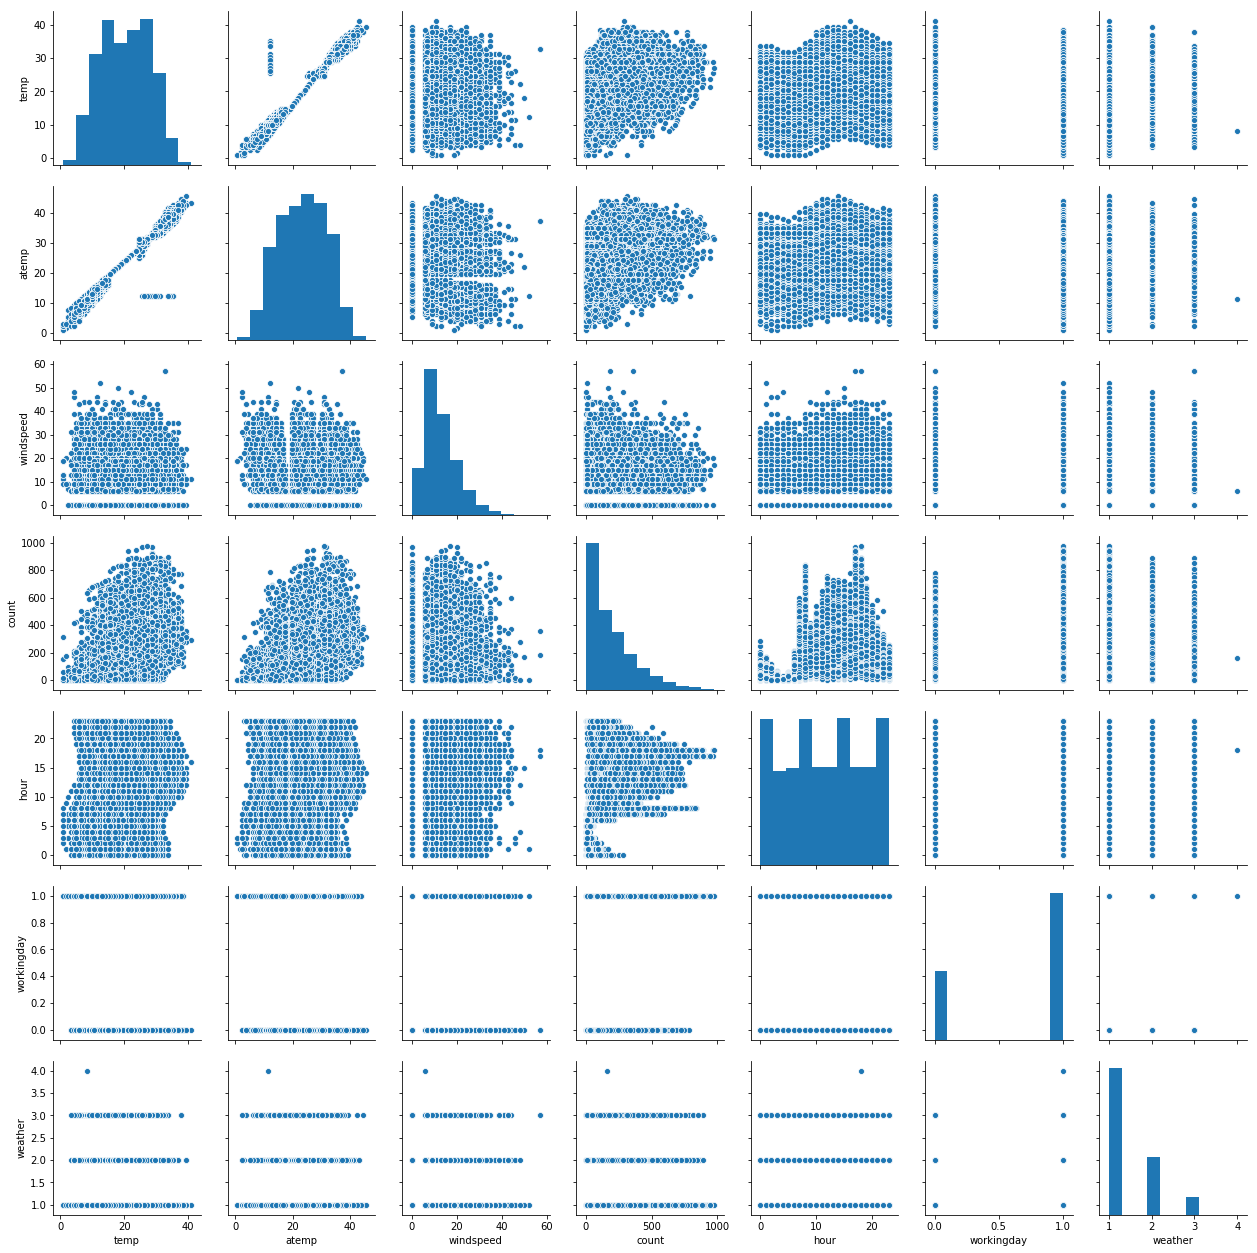

In [362]:
# Plot pairwise relationships in a datasetnusing pirplot
sns.pairplot(df);

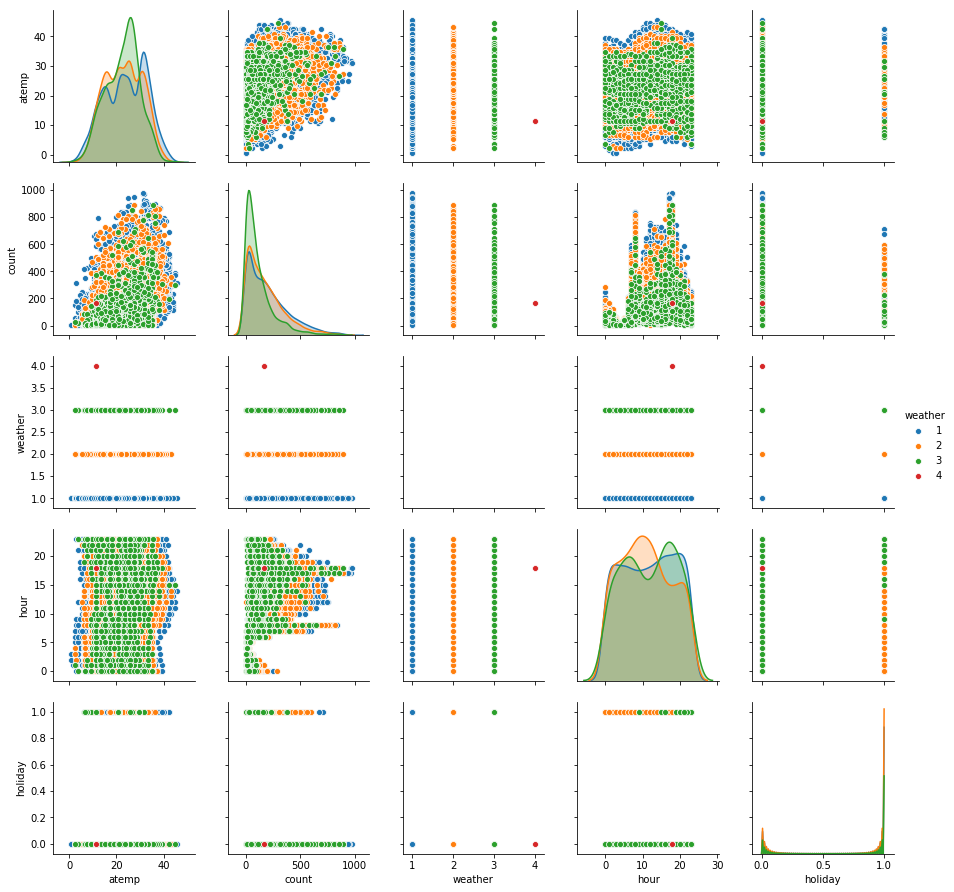

In [359]:
df = data[["atemp", "count", "weather", "hour", "holiday"]]
sns.pairplot(df, hue = 'weather');

#### Question: 
En supposant qu’on ait accès au sexe et à l’âge des abonnés, quelle procédure statistique
vous permettrait de dire si les deux distributions en age (hommes et femmes) sont identiques ou non. Expliquez votre raisonnement.

#### Réponse:

## Partie II Machine Learning
Concevez un modèle qui permette de prédire la variable count, expliquez votre choix
de modèle, justifiez les choix de paramétrage si votre modèle en comporte. Décrivez et
justifiez le critère de performance choisi. Proposez des pistes d’amélioration de votre
méthode/modèle.


### Choix du modèle et justifications
####  - Regression Lineair
####  - ElasticNet
####  - Random Forest Regressor
####  - RMSLE (utilisé dans Kaggle)
####  - RandomSerachCV ( pour les hyper parametres)

In [363]:
# import 
from sklearn.model_selection import train_test_split

# features to consider 
X = data[["season", "workingday","weather", 
          "humidity", "windspeed", "atemp", "hour", "day", "month", "year"]]
# variable to predict
Y = data[["count"]]

# Check the shapes
print('X shape: ', X.shape)
print('Y shape: ', Y.shape)

# split the data into training set and testing set
X_train,X_test, y_train, y_test = train_test_split(X, Y, random_state=42,
                                                   test_size=0.3,
                                                   shuffle=False)
# Check the shapes
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)



X shape:  (10886, 10)
Y shape:  (10886, 1)
X_train shape:  (7620, 10)
y_train shape:  (7620, 1)
X_test shape:  (3266, 10)
y_test shape:  (3266, 1)


RMSLE:  1.2877153552194884


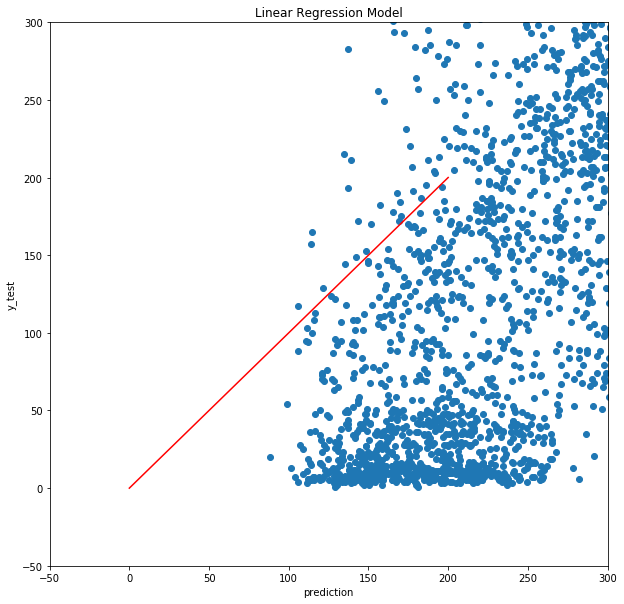

In [364]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

# Initialize logistic regression model
model_lr = LinearRegression()

# Train the model
model_lr.fit(X_train, y_train)
prediction =model_lr.predict(X_test)

# calculate the RMSLE on testing set
print("RMSLE: ", np.sqrt(mean_squared_log_error(y_test, prediction)))

# Plot the data and the linear regression
plt.figure(figsize=(10, 10))
plt.scatter(prediction, y_test)
plt.plot( [0,200],[0,200], color='red')
plt.xlim(-50, 300)
plt.ylim(-50, 300)
plt.xlabel('prediction')
plt.ylabel('y_test')
plt.title('Linear Regression Model');

In [365]:
# Linear regression with combined L1 and L2 priors as regularizer.
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import RandomizedSearchCV

# Create the random grid
random_grid = {'max_iter':[3000, 4000, 5000],
               'alpha':[0.01,0.05,0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000],
               'l1_ratio' : [0, 0.1, 0.5, 0.8, 1]
              }
# Initialize ElasticNet
regressor = ElasticNet()

# Random search of parameters, using 3 fold cross validation
lr_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid,
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

lr_random.fit(X_train, y_train)
prediction = lr_random.predict(X_test)
print (lr_random.best_params_)



Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.0s


{'max_iter': 4000, 'l1_ratio': 0.1, 'alpha': 0.05}


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   12.9s finished


RMSLE:  1.2447752484752899


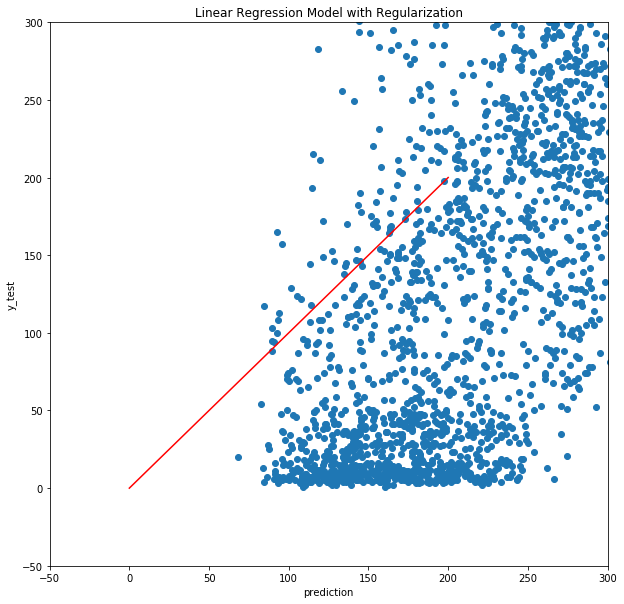

In [366]:
# use the best parameters 
regressor = ElasticNet(max_iter=4000, l1_ratio=0.1, alpha=0.05)
regressor.fit(X_train, y_train)
predictiont = regressor.predict(X_test)

# calculate the RMSLE on testing set
print("RMSLE: ", np.sqrt(mean_squared_log_error(y_test, prediction)))

# Plot the data and the linear regression
plt.figure(figsize=(10, 10))
plt.scatter(prediction, y_test)
plt.plot( [0,200],[0,200], color='red')
plt.xlim(-50, 300)
plt.ylim(-50, 300)
plt.xlabel('prediction')
plt.ylabel('y_test')
plt.title('Linear Regression Model with Regularization');

In [367]:
from sklearn.ensemble import RandomForestRegressor

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train.values.ravel())

#Print the best parameters
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  6.1min
C:\Users\33642\Anaconda3\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 13.8min finished


{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 80,
 'bootstrap': True}

In [225]:
# use the rf_random.best_params_
model = RandomForestRegressor(n_estimators=800, max_depth=None,min_samples_split=5,
                              min_samples_leaf=2, max_features='auto',                              
                              bootstrap=True,
                              n_jobs=-1).fit(X_train, y_train.values.ravel())
#prediction
prediction =model.predict(X_train)
prediction

array([ 26.18506647,  31.14699517,  27.5872141 , ..., 813.33492857,
       538.53617059, 386.05682463])

RMSLE:  0.2195092002876604


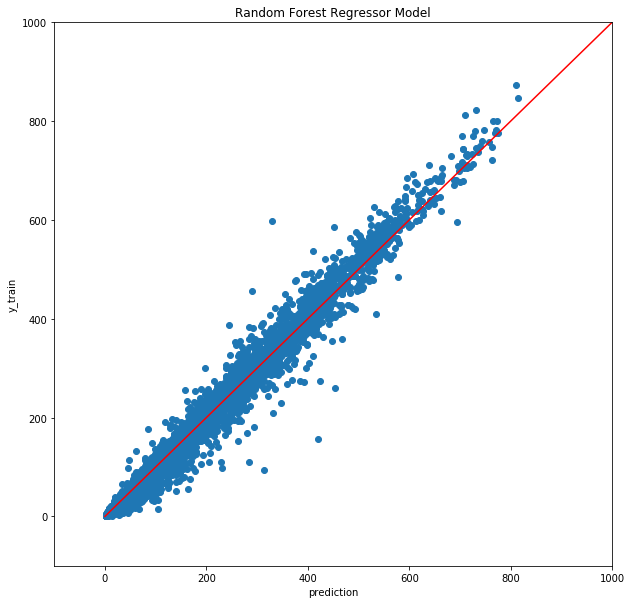

In [226]:
# Plot the data and the linear regression
plt.figure(figsize=(10, 10))
plt.scatter(prediction, y_train)
plt.plot( [0,1000],[0,1000], color='red')
plt.xlim(-100, 1000)
plt.ylim(-100, 1000)
plt.xlabel('prediction')
plt.ylabel('y_train')
plt.title('Random Forest Regressor Model')

# calculate the RMSLE on training set
print("RMSLE: ", np.sqrt(mean_squared_log_error(y_train, prediction)))

RMSLE:  0.35951916261035294


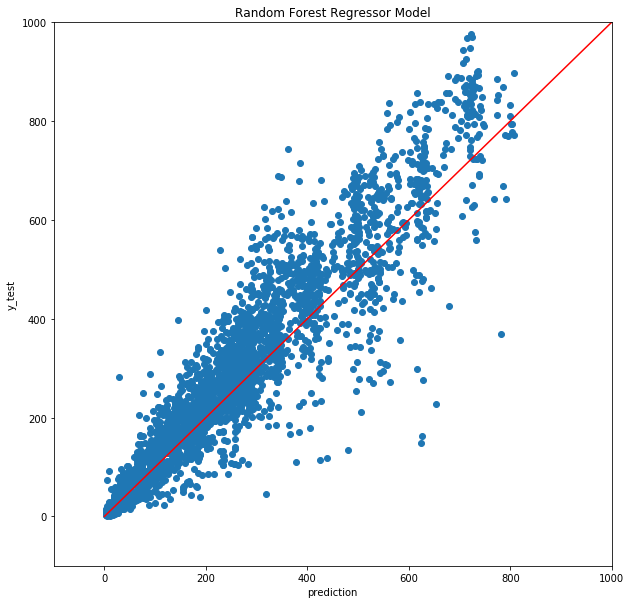

In [227]:
# Make prediction
prediction =model.predict(X_test)

# Calculate the RMSLE on testing set
print("RMSLE: ", np.sqrt(mean_squared_log_error(y_test, prediction)))

#Plot the data and the linear regression
plt.figure(figsize=(10, 10))
plt.scatter(prediction, y_test)
plt.plot( [0,1000],[0,1000], color='red')
plt.xlim(-100, 1000)
plt.ylim(-100, 1000)
plt.xlabel('prediction')
plt.ylabel('y_test')
plt.title('Random Forest Regressor Model')


## Conclusion